# Gráficos

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

## Gráfico Básico de Linhas

In [3]:
dataset = pd.read_csv('AirPassengers.csv')
dataset

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<Axes: >

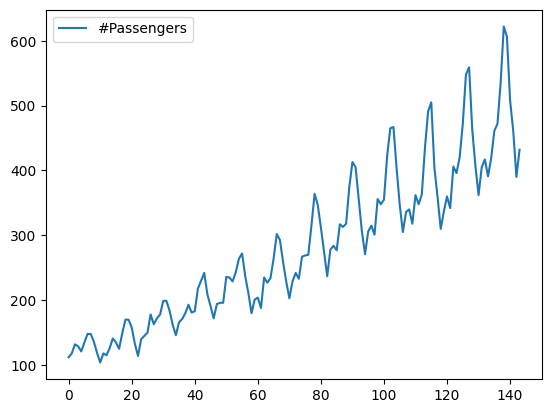

In [4]:
# Função básica para gerar gráfico
dataset.plot()

<Axes: xlabel='Month'>

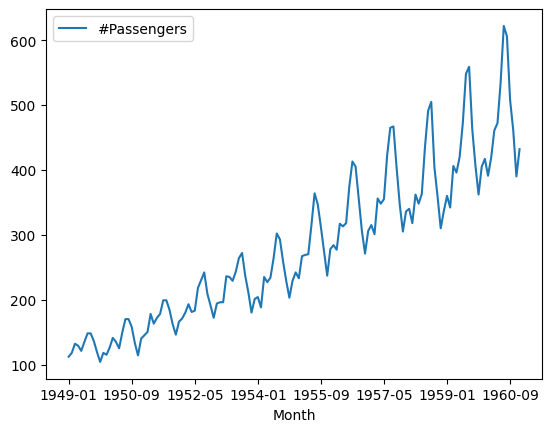

In [ ]:
# Aplicando formatações
dataset.set_index("Month").plot()
# dataset.plot(x = "Month")

<Axes: xlabel='Month'>

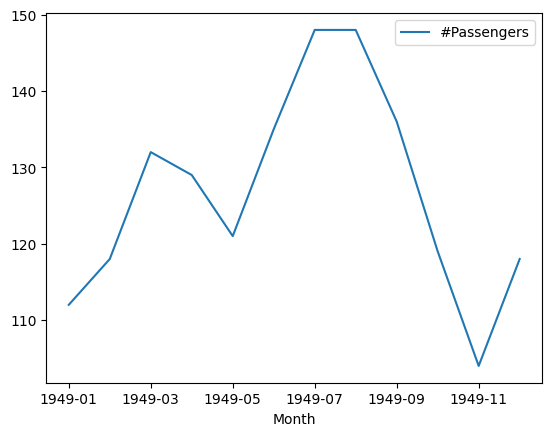

In [6]:
# Filtros usando datas específicas
dataset.set_index("Month").loc["1949-01":"1949-12"].plot()

## Formatação

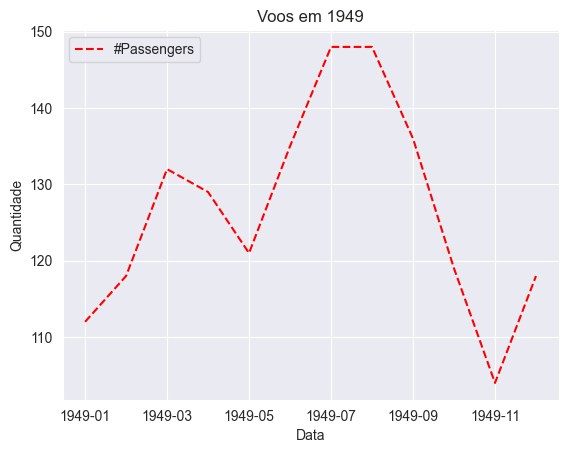

In [23]:
dataset.set_index("Month").loc["1949-01":"1949-12"].plot(title="Voos em 1949",
                                                         xlabel="Data",
                                                         ylabel="Quantidade",
                                                         color="red",
                                                         style="--",
                                                         legend=True).legend(loc="upper left")

In [21]:
import seaborn as sns

In [22]:
sns.set_style("darkgrid")

## Subgráficos

In [24]:
dataset = pd.read_csv('census.csv')
dataset.dtypes

age                int64
workclass         object
final-weight       int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loos       int64
hour-per-week      int64
native-country    object
income            object
dtype: object

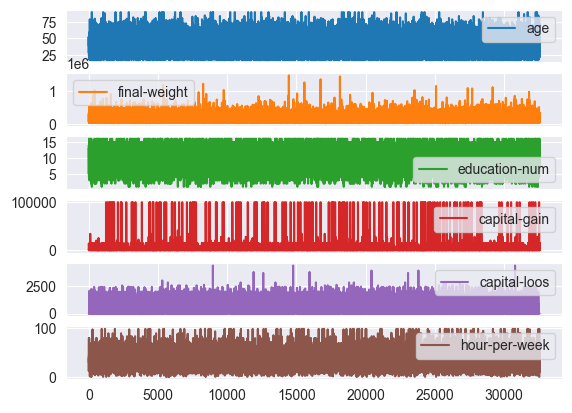

In [25]:
dataset.plot(subplots = True);

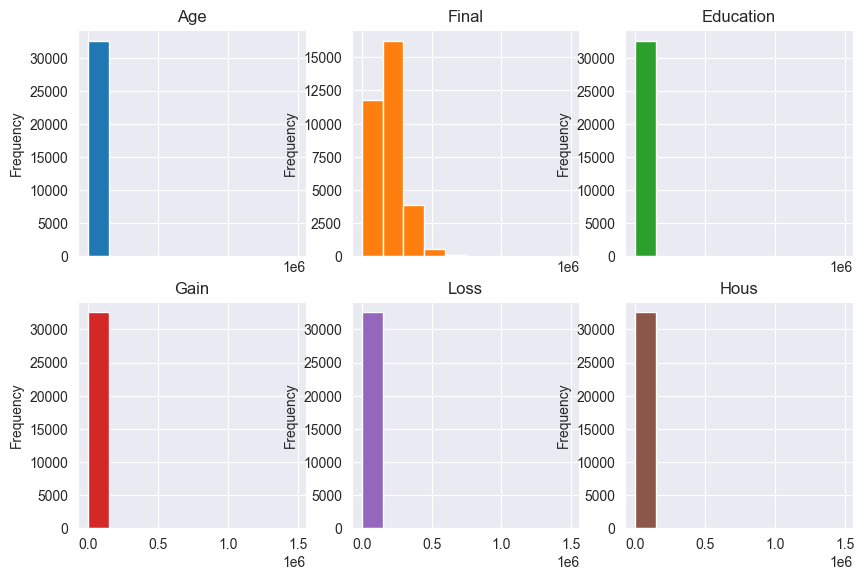

In [26]:
dataset.plot(subplots = True, layout = (3, 3), figsize = (10,10),
             title = ["Age", "Final", "Education", "Gain", "Loss", "Hous"],
             legend = False, kind = "hist");

## Gráfico de Barras


In [27]:
dataset.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

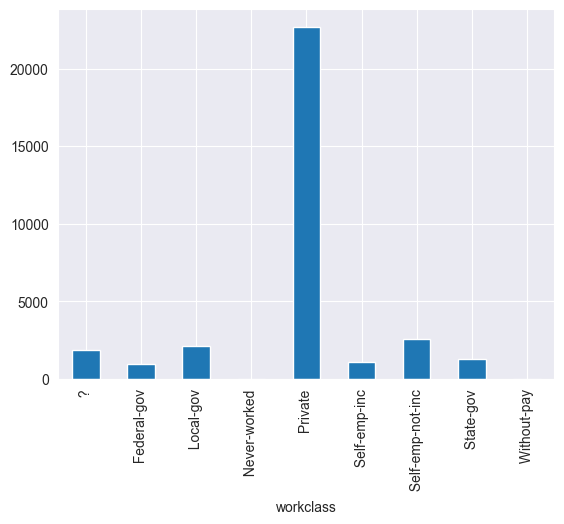

In [28]:
dataset.groupby("workclass")["age"].count().plot(kind = "bar");

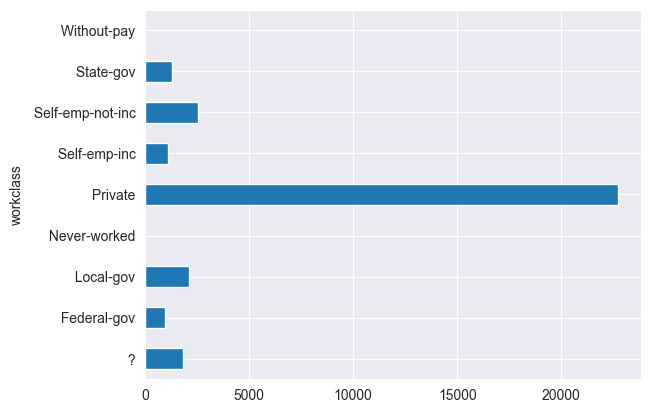

In [29]:
# Horizontal
dataset.groupby("workclass")["age"].count().plot.barh();

In [30]:
pivot = dataset.query("workclass != ' Never-worked' and workclass != ' Without-pay'").pivot_table(index = "income",
                            columns = "workclass",
                            values = "education-num",
                            aggfunc = "sum").apply(lambda x: x * 100 / sum(x), axis = 1)

pivot

workclass,?,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov
income,,,,,,,
<=50K,6.262579,2.605364,6.589146,70.676466,2.125640,7.434676,4.306129
>50K,2.371303,4.788735,8.230914,62.296396,8.117785,9.186464,5.008402


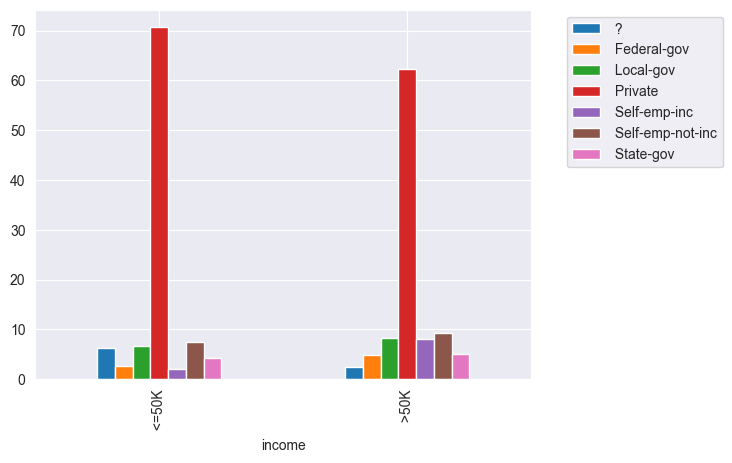

In [31]:
pivot.plot.bar().legend(bbox_to_anchor = (1.4,1));

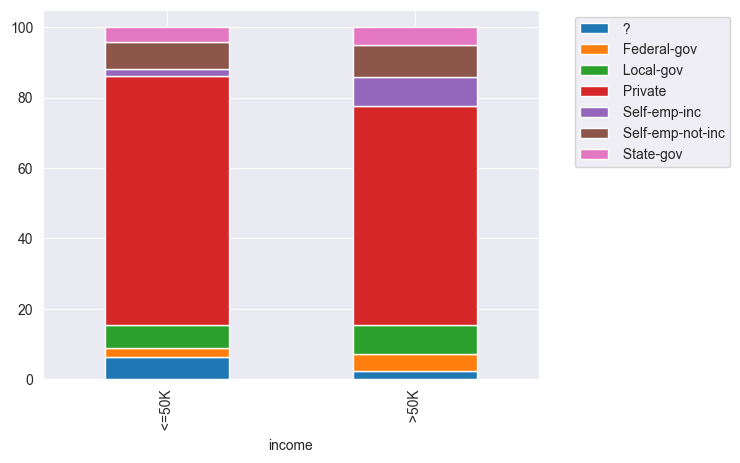

In [32]:
pivot.plot.bar(stacked = True).legend(bbox_to_anchor = (1.4,1));

## Gráfico de Pizza

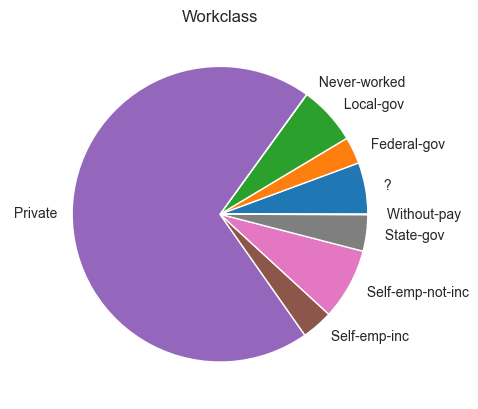

In [33]:
dataset.groupby("workclass")["age"].count().plot.pie(title = "Workclass", ylabel = "");

In [34]:
dataset.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

## Gráfico de Disperção

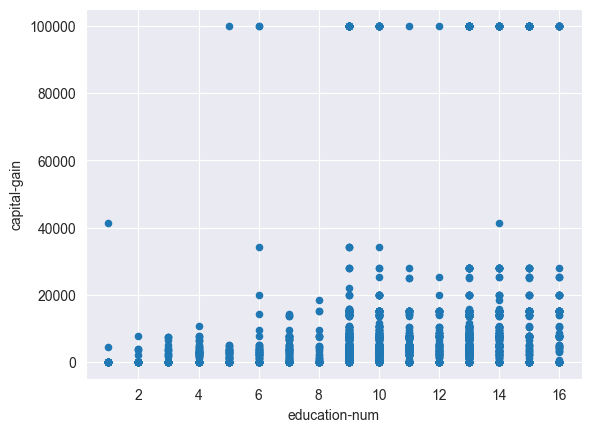

In [ ]:
# Gráfico de dispersão - Relacionamento entre duas colunas numericas
dataset.plot.scatter(x = "education-num", y = "capital-gain");

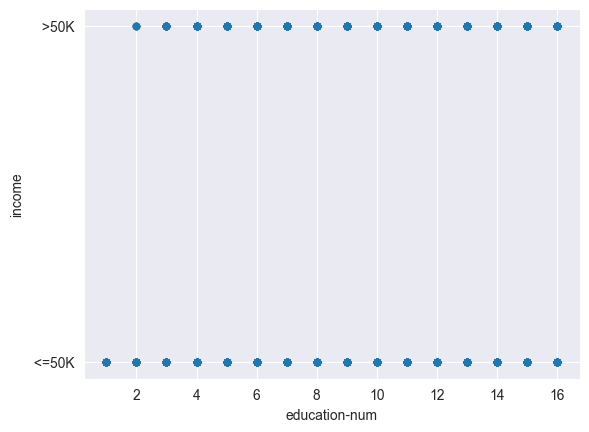

In [36]:
dataset.plot.scatter(x = "education-num", y = "income");

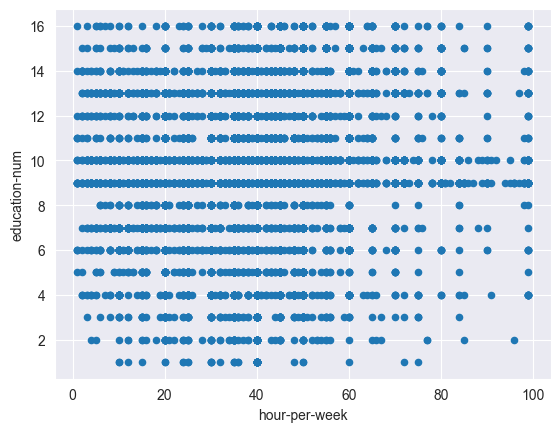

In [37]:
dataset.plot.scatter(x = "hour-per-week", y = "education-num");

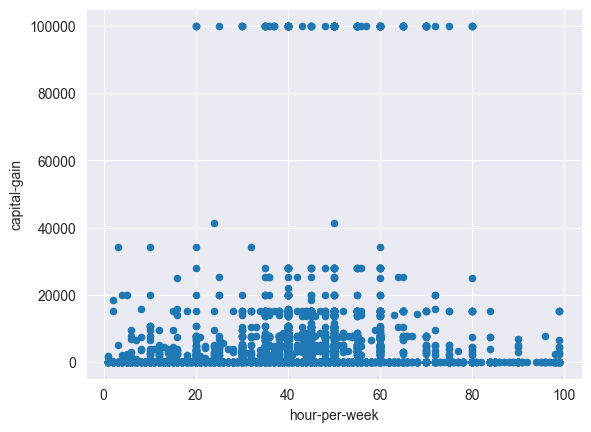

In [38]:
dataset.plot.scatter(x = "hour-per-week", y = "capital-gain");

## Histrograma

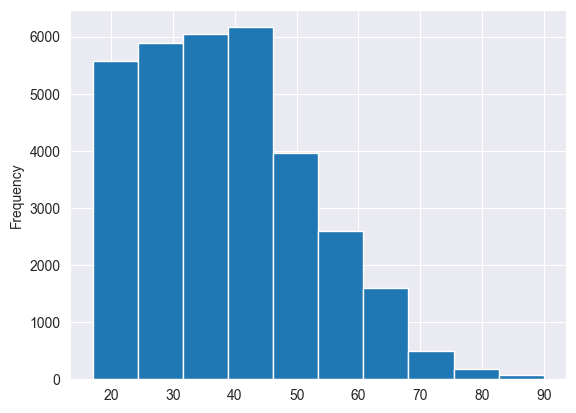

In [39]:
# Criando histograma
dataset["age"].plot.hist();

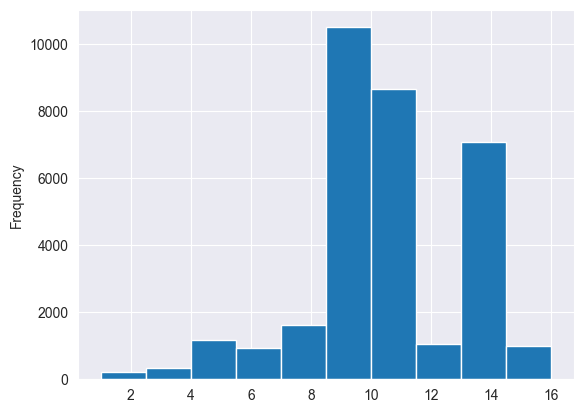

In [40]:
dataset["education-num"].plot.hist();

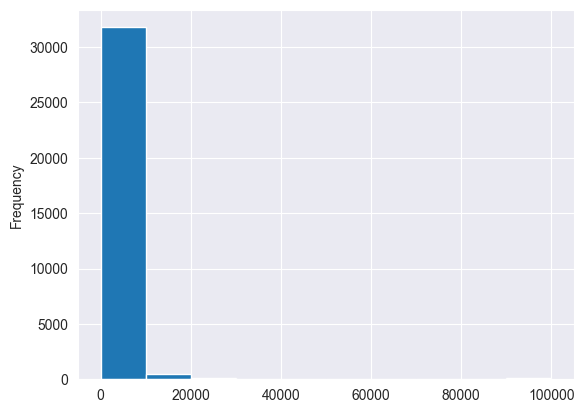

In [41]:
dataset["capital-gain"].plot.hist();

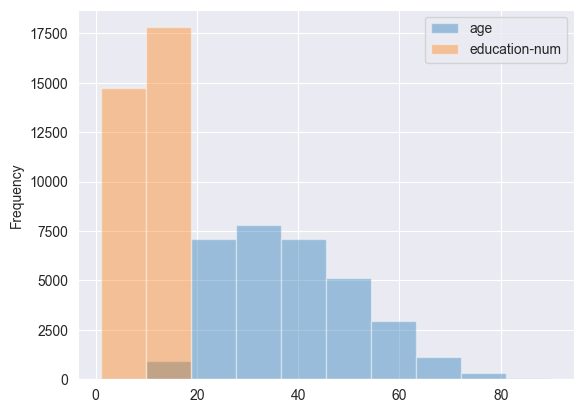

In [ ]:
# alpha indica a transparencia
dataset[["age", "education-num"]].plot.hist(alpha = 0.4);

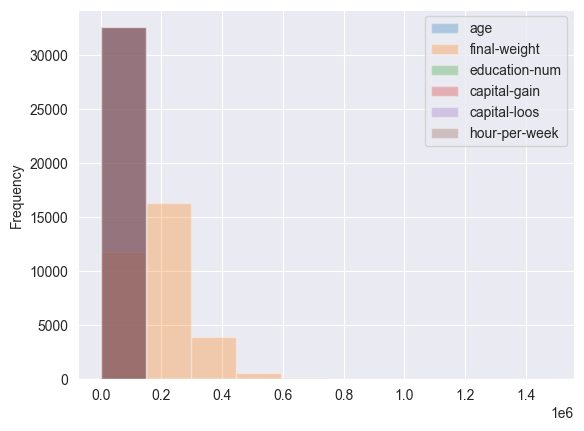

In [43]:
plot = dataset.plot.hist(alpha = 0.3);

In [44]:
plot.figure.savefig("histograma.png")